# Proceso de ETL (Extracción, transformación y carga de datos)

## Introducción

En la actualidad, la seguridad vial es un tema de gran relevancia en las ciudades de todo el mundo, y Buenos Aires no es la excepción. La movilidad urbana y la seguridad en las calles son preocupaciones primordiales para las autoridades gubernamentales y la sociedad en general. En este contexto, el presente trabajo se enfoca en analizar datos cruciales en el contexto de los siniestros viales y, en particular, los homicidios de la ciudad de Buenos Aires.

El análisis de datos desempeña un papel esencial en la toma de decisiones informadas para abordar los desafíos de seguridad vial. En este sentido, se ha recurrido a la recopilación y procesamiento de datos provenientes de fuentes oficiales, como el Gobierno de la Ciudad de Buenos Aires y el Observatorio de Movilidad y Seguridad Vial de la ciudad. Sin embargo, antes de que estos datos puedan ser utilizados de manera efectiva, es necesario someterlos a un proceso riguroso de Extracción, Transformación y Carga (ETL).

El proceso ETL es una piedra angular en la preparación y análisis de datos, permitiendo la obtención de información valiosa a partir de conjuntos de datos complejos y dispersos. En este contexto, el ETL se convierte en una herramienta esencial para identificar tendencias, evaluar KPIs (Indicadores Clave de Desempeño) y proporcionar información sólida para la toma de decisiones estratégicas en el ámbito de la seguridad vial.

El objetivo central de este trabajo es analizar dos KPIs específicos: la reducción del 10% en el número de víctimas fatales en siniestros viales por cada 100.000 habitantes de la ciudad  y una reducción del 7% en el número de víctimas de motocicletas por cada 100.000 habitantes, ambos en el último semestre de 2021. Para lograrlo, se aplicará un proceso ETL exhaustivo a los conjuntos de datos pertinentes, permitiendo así una evaluación precisa del progreso y el impacto de las políticas y medidas implementadas en la seguridad vial de Buenos Aires.

In [35]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopy.geocoders import Nominatim


In [36]:
# Replace this with your CSV file path
csv = r'homicidios\HECHOS.csv'

# Read the CSV file with UTF-8 encoding
df_homicidios_hechos = pd.read_csv(csv, encoding='utf-8')



In [37]:
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


En primer lugar, se observan errores en caracteres, particularmente con la Ñ que no son resultos con diferentes codificaciones del archivo porque están mal provistos desde el origen.
Se busca reemplazar los caracteres.

In [38]:
df_homicidios_hechos.replace(to_replace=['Ã‘', r'\?'], value=['Ñ', 'Ñ'], regex=True, inplace=True)

In [39]:
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PEÑA, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÑA, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [40]:
df_homicidios_hechos.dtypes

ID                        object
N_VICTIMAS                 int64
FECHA                     object
AAAA                       int64
MM                         int64
DD                         int64
HORA                      object
HH                        object
LUGAR_DEL_HECHO           object
TIPO_DE_CALLE             object
Calle                     object
Altura                   float64
Cruce                     object
Dirección Normalizada     object
COMUNA                     int64
XY (CABA)                 object
pos x                     object
pos y                     object
PARTICIPANTES             object
VICTIMA                   object
ACUSADO                   object
dtype: object

Observamos el tipo de datos que tenemos asignados para cada columna y cambiamos los tipos a los valores correspondientes.

In [41]:
# Convert 'pos x' and 'pos y' to numeric, coerce errors to NaN
df_homicidios_hechos['pos x'] = pd.to_numeric(df_homicidios_hechos['pos x'], errors='coerce')
df_homicidios_hechos['pos y'] = pd.to_numeric(df_homicidios_hechos['pos y'], errors='coerce')

# Convert the "fecha" column to date values
df_homicidios_hechos['FECHA'] = pd.to_datetime(df_homicidios_hechos['FECHA'], format='%Y-%m-%d')


Se prueba que no haya outliers en las coordenadas. Se procede a buscar que todos los puntos estén contenidos dentro de CABA.

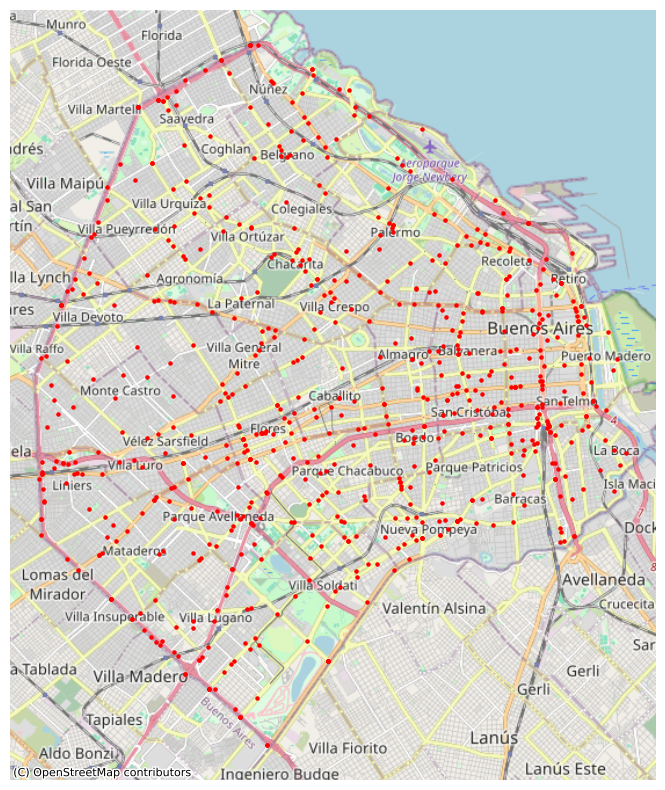

In [42]:

# Convert the DataFrame to a GeoDataFrame in WGS84 (lat/lon)
gdf_homicidios = gpd.GeoDataFrame(
    df_homicidios_hechos, 
    geometry=gpd.points_from_xy(df_homicidios_hechos['pos x'], df_homicidios_hechos['pos y'])
)
gdf_homicidios.crs = 'epsg:4326'  # Set coordinate reference system to WGS84

# Convert to Web Mercator for contextily basemap
gdf_homicidios = gdf_homicidios.to_crs(epsg=3857)

# Plotting with the basemap
ax = gdf_homicidios.plot(marker='o', color='red', markersize=5, figsize=(10, 10))  # Adjust markersize as needed
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Using OpenStreetMap.Mapnik as the basemap
ax.set_axis_off()
plt.show()


Se decide la eliminación de las columnas AAAA, MM, DD y Hora, ya que los mismos están contenidos en FECHA y HH. Se trabajará con franjas horarias, por lo que mayor especificididad en los minutos no es necesaria.

Se eliminan Lugar_del_Hecho y Dirección Normalizada por estar contenidos dentro de Calles, Altura y Cruce.

Se elimina XY (CABA) ya que se cuenta con las latitudes y longitudes, por lo que se genera redundancia.

In [43]:
columnas_sobrantes = ['AAAA', 'MM', 'DD', 'HORA', 'LUGAR_DEL_HECHO', 'Dirección Normalizada', 'XY (CABA)']
df_homicidios_hechos.drop(columns=columnas_sobrantes, inplace=True)

In [44]:
df_homicidios_hechos.dtypes

ID                       object
N_VICTIMAS                int64
FECHA            datetime64[ns]
HH                       object
TIPO_DE_CALLE            object
Calle                    object
Altura                  float64
Cruce                    object
COMUNA                    int64
pos x                   float64
pos y                   float64
PARTICIPANTES            object
VICTIMA                  object
ACUSADO                  object
dtype: object

Se decide combinar altura y cruce, fusionarlos en Altura, puesto que el dato faltante en una columna está contenido en la otra por tratarse de la altura o la calle que intersecta que vendría a hacer lo mismo.

Además, el análisis se basará en el estudio de proximidad a través de las coordenadas.

In [45]:
df_homicidios_hechos['Cruce'].fillna(df_homicidios_hechos['Altura'], inplace=True)
df_homicidios_hechos.drop(columns='Altura', inplace=True)
df_homicidios_hechos.rename(columns={'Cruce': 'Altura'}, inplace=True)

In [46]:
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


Se observa que el comportamiento de la columna Participantes es la conjunción entre Víctima y Acusado, de manera tal que se procede a averiguar que esto sea efectivamente así.

In [47]:
# Create a custom function to check if "PARTICIPANTES" is a conjunction of "VICTIMA" and "ACUSADO"
def hay_conjuncion(row):
    participantes = row['PARTICIPANTES'].lower()  # Convert to lowercase for case-insensitive comparison
    victima = row['VICTIMA'].lower()
    acusado = row['ACUSADO'].lower()

    # Check if "PARTICIPANTES" contains both "VICTIMA" and "ACUSADO"
    return (victima in participantes) and (acusado in participantes)

# Apply the custom function to each row of the DataFrame and filter for False values
filas_falsas = df_homicidios_hechos[~df_homicidios_hechos.apply(hay_conjuncion, axis=1)]

# Count the number of rows where the condition is False
num_false_rows = len(filas_falsas)

# Print the rows where the condition is False and the count
print("Rows where the condition is False:")
print(filas_falsas)
print("\nNumber of False Rows:", num_false_rows)


Rows where the condition is False:
            ID  N_VICTIMAS      FECHA  HH TIPO_DE_CALLE  \
31   2016-0044           1 2016-03-31  19       AVENIDA   
62   2016-0085           1 2016-06-29  22       AVENIDA   
143  2016-0178           1 2016-12-30  16         CALLE   
146  2017-0007           1 2017-01-11  17         CALLE   
153  2017-0014           1 2017-01-28   8       AVENIDA   
174  2017-0040           1 2017-04-03   9       AVENIDA   
225  2017-0101           1 2017-08-23  10       AVENIDA   
277  2018-0003           1 2018-01-05  10       AVENIDA   
278  2018-0004           1 2018-01-09   9       AVENIDA   
333  2018-0059           1 2018-06-08   6       AVENIDA   
355  2018-0081           1 2018-07-29   6       AVENIDA   
371  2018-0097           1 2018-09-02  10       AVENIDA   
375  2018-0101           1 2018-09-21   0      GRAL PAZ   
425  2019-0008           1 2019-01-30  22      GRAL PAZ   
444  2019-0027           1 2019-03-28  11       AVENIDA   
458  2019-0041       

En todos los casos, excepto 3 donde la categoría Otro como acusado hace referencia a un Movil, sea ambulancia, patrullero, etc.

Esto motiva a eliminar la columna Participantes por generar redundancia.

In [48]:
df_homicidios_hechos.drop(columns='PARTICIPANTES', inplace=True)

In [49]:
df_homicidios_hechos

,ID,N_VICTIMAS,FECHA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,1,2016-01-10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD
4,2016-0005,1,2016-01-21,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO,AUTO
692,2021-0094,1,2021-12-20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO,AUTO
693,2021-0095,1,2021-12-30,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO,CARGAS
694,2021-0096,1,2021-12-15,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO,CARGAS


Antes de fusionar el dataset Víctimas que proveen mayor información, se copian las filas donde el número de víctimas sea mayor a 1, ya que en el dataset Víctimas se encuentra una fila adicional por cada víctima dentro del mismo siniestro.

In [50]:
# Assuming df_homicidios_hechos is your DataFrame

# Create a new DataFrame containing additional rows for each N_VICTIMAS beyond the first
filas_expandidas = []

for index, row in df_homicidios_hechos.iterrows():
    n_victimas = row['N_VICTIMAS']
    
    if n_victimas > 1:
        # Create a DataFrame with additional rows and fill them with the original row's data
        filas_adicionales = pd.DataFrame([row] * (n_victimas - 1))
        
        # Append the additional rows to the list
        filas_expandidas.append(filas_adicionales)

# Concatenate the original DataFrame with the expanded rows
df_homicidios_hechos = pd.concat([df_homicidios_hechos] + filas_expandidas, ignore_index=True)

# Print the expanded DataFrame
df_homicidios_hechos.drop(columns='N_VICTIMAS', inplace=True)
df_homicidios_hechos


,ID,FECHA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,2016-01-10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD
4,2016-0005,2016-01-21,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...
712,2018-0128,2018-11-25,4,GRAL PAZ,"PAZ, GRAL. AV.",11200.0,9,-58.528446,-34.645929,AUTO,PASAJEROS
713,2019-0010,2019-02-02,7,AVENIDA,DEL LIBERTADOR AV.,4100.0,14,-58.426685,-34.569615,PEATON,AUTO
714,2020-0038,2020-08-30,4,AVENIDA,LAS HERAS GENERAL AV.,"DIAZ, CNEL. AV.",14,-58.406175,-34.583459,AUTO,AUTO
715,2020-0063,2020-12-05,7,CALLE,NUEVA YORK,ALTA GRACIA,11,-58.527838,-34.610470,PEATON_MOTO,MOTO


Se procede a cargar el dataset Víctimas para el ETL.

In [51]:

# Specify the path to the "VICTIMAS.csv" file
ruta_archivo = r"homicidios\VICTIMAS.csv"  # Replace with the actual file path

# Read the CSV file into a DataFrame
victimas_df = pd.read_csv(ruta_archivo)

# Print the first few rows of the DataFrame to check its contents
victimas_df


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


Del dataset Víctimas, se adicionan los datos relativos a Rol, Sexo, Edad y Fecha de fallecimiento de la víctima.

In [52]:

# Assuming expanded_df_homicidios_hechos is your DataFrame and victimas_df is the DataFrame from "VICTIMAS.csv"

# Merge the two DataFrames based on matching "ID" and "ID_hecho"
combinado_df = df_homicidios_hechos.merge(
    victimas_df[['ID_hecho', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']],
    left_on='ID',
    right_on='ID_hecho',
    how='left'
)

# Print the merged DataFrame
combinado_df = combinado_df.drop_duplicates()
combinado_df.drop(columns='ID_hecho', inplace=True)
combinado_df

,ID,FECHA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,2021-12-13,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,2021-12-20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,2021-12-30,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,2021-12-15,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20 00:00:00


Se modifica los tipos de columna de fechas de fallecimiento al tipo de dato de fecha.

In [53]:


# Assuming merged_df is your DataFrame

# Convert "FECHA_FALLECIMIENTO" to date format without the time
combinado_df['FECHA_FALLECIMIENTO'] = combinado_df.apply(
    lambda row: pd.to_datetime(row['FECHA_FALLECIMIENTO']).date() if row['FECHA_FALLECIMIENTO'] != 'SD' else 'SD',
    axis=1
)

# Print the DataFrame with the modified "FECHA_FALLECIMIENTO" column
combinado_df

C:\Users\juanp\AppData\Local\Temp\ipykernel_21076\3134489331.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lambda row: pd.to_datetime(row['FECHA_FALLECIMIENTO']).date() if row['FECHA_FALLECIMIENTO'] != 'SD' else 'SD',


,ID,FECHA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,2021-12-13,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
713,2021-0094,2021-12-20,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
714,2021-0095,2021-12-30,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02
715,2021-0096,2021-12-15,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20


Se agrega una columna con el nombre del día, nos será útil para el análisis posterior.

In [54]:


# Assuming you have a DataFrame named merged_df
# Convert the "FECHA" column to datetime
combinado_df['FECHA'] = pd.to_datetime(combinado_df['FECHA'])

# Extract the day of the week in Spanish and create a new column "day"
combinado_df['DIA'] = combinado_df['FECHA'].dt.strftime('%A').str.upper()

# Define a mapping dictionary for English to Spanish day names
day_mapping = {
    'MONDAY': 'LUNES',
    'TUESDAY': 'MARTES',
    'WEDNESDAY': 'MIERCOLES',
    'THURSDAY': 'JUEVES',
    'FRIDAY': 'VIERNES',
    'SATURDAY': 'SABADO',
    'SUNDAY': 'DOMINGO'
}

# Replace the English day names with Spanish names
combinado_df['DIA'] = combinado_df['DIA'].replace(day_mapping)

# Get the index of the "day" column
indice_columna_dia = combinado_df.columns.get_loc("DIA")

# Insert the "day" column at position 2
combinado_df.insert(2, "DIA", combinado_df.pop("DIA"))

In [55]:
combinado_df

,ID,FECHA,DIA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,VIERNES,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,SABADO,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,DOMINGO,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,DOMINGO,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,JUEVES,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,2021-12-13,LUNES,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
713,2021-0094,2021-12-20,LUNES,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
714,2021-0095,2021-12-30,JUEVES,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02
715,2021-0096,2021-12-15,MIERCOLES,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20


## Análisis de los datos faltantes

La calidad de los datos es un pilar fundamental en cualquier análisis estadístico y, en el contexto de la seguridad vial, no es la excepción. La recolección y disponibilidad de datos precisos y completos sobre los siniestros viales y, especialmente, sobre las víctimas, son elementos críticos para comprender la magnitud del problema y tomar decisiones informadas para su mitigación.

Los datos faltantes pueden introducir márgenes de error significativos en cualquier estudio, lo que a su vez puede llevar a conclusiones sesgadas o inexactas. En el caso de los siniestros viales, la falta de información completa sobre las víctimas puede distorsionar la percepción de la gravedad de la situación y dificultar la identificación de patrones y tendencias.

Sin embargo, la importancia de abordar este problema va más allá de la precisión de los análisis. La disponibilidad de datos completos y confiables es fundamental para la formulación y evaluación de políticas públicas efectivas. Solo con una comprensión precisa de quiénes son las víctimas, cómo ocurrieron los incidentes y qué factores contribuyeron, podemos diseñar estrategias adecuadas para reducir la incidencia de siniestros viales y minimizar sus consecuencias.

Por lo tanto, el énfasis en la cantidad de datos faltantes no solo se justifica por la necesidad de realizar análisis estadísticos rigurosos, sino también por la imperiosa necesidad de mejorar la calidad de los datos disponibles. Esto implica implementar políticas y prácticas que fomenten la recopilación exhaustiva de información, promover la transparencia en la divulgación de datos y trabajar en estrecha colaboración con las autoridades relevantes para cerrar las brechas de información.

En última instancia, solo con datos completos y precisos podemos tomar decisiones informadas y eficaces para abordar el desafío de la seguridad vial y trabajar hacia la reducción de víctimas en siniestros viales en nuestra ciudade.

In [56]:
# Calcular la cantidad de datos nulos por columna
datos_nulos_por_columna = combinado_df.isnull().sum()

# Calcular la cantidad de "SD" (sin datos) por columna
sd_por_columna = (combinado_df == "SD").sum()

# Calcular el número total de filas en el DataFrame
total_filas = len(combinado_df)

# Calcular el porcentaje de "SD" en cada columna
porcentaje_faltantes = ((datos_nulos_por_columna + sd_por_columna) / total_filas) * 100

# Crear un DataFrame a partir de los resultados
resultados_df = pd.DataFrame({'Datos_Nulos': datos_nulos_por_columna, 'SD': sd_por_columna,
                              'Porcentaje': porcentaje_faltantes})

resultados_df

,Datos_Nulos,SD,Porcentaje
ID,0,0,0.000000
FECHA,0,0,0.000000
DIA,0,0,0.000000
HH,0,1,0.139470
TIPO_DE_CALLE,0,0,0.000000
Calle,1,0,0.139470
Altura,44,0,6.136681
COMUNA,0,0,0.000000
pos x,13,0,1.813110
pos y,13,0,1.813110


Se observa una gran cantidad de datos faltantes en varios datos sensibles. Algunos que llaman la atención: Altura, Acusado, Edad y Fecha de fallecimiento de la víctima.

En cuanto a la altura, ésta se puede compensar utilizando las coordenadas provistas ya que no faltan tantas en comparación.

En cuanto a edad y fecha de fallecimiento, esto demuestra falta de seguimiento en el trazado de la información, puesto que son datos que deberían ser fáciles de recopilar salvo situaciones demasiado excepcionales. El caso de la edad es uno de ellos puesto que al identificar a la víctima, se puede obtener su identidad y por ende su edad. En cuanto a la fecha de fallecimiento, esto demuestra problemas en origen en el sistema de salud para proveer seguimiento adecuado de la víctima.

In [57]:
df_con_filas_faltantes = combinado_df[combinado_df.isna().any(axis=1)]

In [58]:
# Group by 'TIPO_DE_CALLE' and aggregate to count and sum
result = df_con_filas_faltantes.groupby('TIPO_DE_CALLE').agg({'TIPO_DE_CALLE': 'count'})

# Rename the count column
result.rename(columns={'TIPO_DE_CALLE': 'COUNT'}, inplace=True)

# Display the result DataFrame
print(result)

               COUNT
TIPO_DE_CALLE       
AUTOPISTA         41
CALLE              2
GRAL PAZ           1


Se evidencia que la mayoría de los casos faltantes de la ubicación exacta del siniestro se debe a la incapacidad para informar una dirección en una autopista.

In [59]:
# Create a new DataFrame with non-null values in both 'pos_x' and 'pos_y'
df_faltantes_con_coordenadas = df_con_filas_faltantes[(df_con_filas_faltantes['pos x'].notna()) & (df_con_filas_faltantes['pos y'].notna())]

In [60]:
df_faltantes_con_coordenadas

,ID,FECHA,DIA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,DOMINGO,0,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,4,-58.377146,-34.636575,SD,SD,SD,SD,SD,SD
65,2016-0087,2016-07-02,SABADO,0,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,1,-58.378646,-34.629071,MOTO,OBJETO FIJO,CONDUCTOR,MASCULINO,23,2016-07-03
72,2016-0096,2016-07-25,LUNES,7,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,8,-58.474332,-34.666850,MOTO,CARGAS,CONDUCTOR,MASCULINO,SD,SD
82,2016-0107,2016-08-20,SABADO,8,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,4,-58.371577,-34.654300,MOTO,AUTO,CONDUCTOR,MASCULINO,21,SD
92,2016-0118,2016-09-04,DOMINGO,3,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,1,-58.379367,-34.626945,AUTO,AUTO,CONDUCTOR,MASCULINO,27,2016-09-04
102,2016-0130,2016-10-04,MARTES,12,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,1,-58.379109,-34.627647,MOTO,CARGAS,CONDUCTOR,MASCULINO,29,2016-10-04
129,2016-0160,2016-12-06,MARTES,5,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,-58.519272,-34.636358,CARGAS,OBJETO FIJO,CONDUCTOR,MASCULINO,29,2016-12-06
150,2017-0009,2017-01-16,LUNES,13,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,5,-58.415959,-34.627433,MOTO,CARGAS,CONDUCTOR,MASCULINO,36,2017-01-16
157,2017-0016,2017-02-03,VIERNES,5,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,1,-58.380995,-34.622882,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2017-02-04
242,2017-0112,2017-09-10,DOMINGO,9,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,7,-58.458074,-34.639974,AUTO,OBJETO FIJO,PASAJERO_ACOMPAÑANTE,MASCULINO,1,SD


Probamos mediante código completar las direcciones faltantes.

In [61]:


# Function to get street name and number from coordinates
def get_street_info(lat, lon):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse((lat, lon), exactly_one=True)
    if location:
        direccion = location.raw.get('address', {})
        nombre_calle = direccion.get('road')
        numero_calle = direccion.get('house_number')
        return nombre_calle, numero_calle
    else:
        return None, None

# Assuming merged_df is your DataFrame and it has 'pos x', 'pos y' columns
# Get the first row of the DataFrame
primer_fila = combinado_df.iloc[0]

# Apply the function to the first row
nombre_calle, numero_calle = get_street_info(primer_fila['pos y'], primer_fila['pos x'])

# Output the result
print(f"Nearest Street Name: {nombre_calle}")
print(f"Street Number: {numero_calle}")

Nearest Street Name: Avenida General Francisco Fernández de La Cruz
Street Number: 6502


In [62]:

# Function to get street name and number from coordinates
def get_street_info(lat, lon):
    geolocator = Nominatim(user_agent="geoapiExercises")
    location = geolocator.reverse((lat, lon), exactly_one=True)
    if location:
        address = location.raw.get('address', {})
        street_name = address.get('road')
        street_number = address.get('house_number')
        return street_name, street_number
    else:
        return None, None

# Assuming df_missing_with_coordinates is your DataFrame with 'pos x' and 'pos y' columns
# Apply the function to each row to get street names and street numbers
df_faltantes_con_coordenadas['Street Name'], df_faltantes_con_coordenadas['Street Number'] = zip(*df_faltantes_con_coordenadas.apply(lambda row: get_street_info(row['pos y'], row['pos x']), axis=1))

# Create a new DataFrame for street names
street_name_df = df_faltantes_con_coordenadas[['Street Name']]

# Create a new DataFrame for street numbers
street_number_df = df_faltantes_con_coordenadas[['Street Number']]

C:\Users\juanp\AppData\Local\Temp\ipykernel_21076\1926894001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faltantes_con_coordenadas['Street Name'], df_faltantes_con_coordenadas['Street Number'] = zip(*df_faltantes_con_coordenadas.apply(lambda row: get_street_info(row['pos y'], row['pos x']), axis=1))
C:\Users\juanp\AppData\Local\Temp\ipykernel_21076\1926894001.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faltantes_con_coordenadas['Street Name'], df_faltantes_con_coordenadas['Street Num

In [63]:
columns_to_drop = ['ID', 'FECHA', 'DIA', 'HH',  'Altura', 'COMUNA', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']
df_faltantes_con_coordenadas.drop(columns=columns_to_drop, inplace=True)

C:\Users\juanp\AppData\Local\Temp\ipykernel_21076\3846458448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_faltantes_con_coordenadas.drop(columns=columns_to_drop, inplace=True)


In [64]:
df_faltantes_con_coordenadas

,TIPO_DE_CALLE,Calle,pos x,pos y,Street Name,Street Number
36,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,-58.377146,-34.636575,Aristóbulo Del Valle,1851
65,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,-58.378646,-34.629071,Avenida Caseros,1064
72,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,-58.474332,-34.666850,Autopista Teniente General Luis Dellepiane,None
82,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,-58.371577,-34.654300,Autopista Presidente Arturo Frondizi,None
92,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,-58.379367,-34.626945,Avenida Bernardo de Irigoyen,None
102,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,-58.379109,-34.627647,Brasil,None
129,AUTOPISTA,AUTOPISTA PERITO MORENO,-58.519272,-34.636358,Autopista Perito Moreno,None
150,AUTOPISTA,AUTOPISTA 25 DE MAYO,-58.415959,-34.627433,Avenida Boedo,None
157,AUTOPISTA,AUTOPISTA 25 DE MAYO,-58.380995,-34.622882,Autopista 25 de Mayo,None
242,AUTOPISTA,AUTOPISTA 25 DE MAYO,-58.458074,-34.639974,Metrobús 25 de Mayo,None


Sin embargo, el resultado no arroja los valores esperados por lo que desestimamos este análisis.

In [65]:
# Create a new DataFrame with nnull values in both 'pos_x' and 'pos_y'
df_faltantes_sin_coordenadas = df_con_filas_faltantes[(df_con_filas_faltantes['pos x'].isna()) & (df_con_filas_faltantes['pos y'].isna())]

In [66]:
df_faltantes_sin_coordenadas

,ID,FECHA,DIA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
39,2016-0052,2016-04-20,MIERCOLES,20,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,NaN,NaN,MOTO,SD,SD,SD,SD,SD
108,2016-0136,2016-10-25,MARTES,0,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,NaN,NaN,MOTO,CARGAS,CONDUCTOR,SD,SD,SD
121,2016-0151,2016-11-18,VIERNES,20,CALLE,NaN,NaN,0,NaN,NaN,PEATON,SD,PEATON,SD,SD,SD
141,2016-0174,2016-12-27,MARTES,0,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,0,NaN,NaN,SD,SD,SD,SD,SD,SD
182,2017-0042,2017-04-10,LUNES,9,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NaN,14,NaN,NaN,MOTO,CARGAS,CONDUCTOR,MASCULINO,SD,2017-04-10
186,2017-0050,2017-04-28,VIERNES,11,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,NaN,NaN,MOTO,CARGAS,CONDUCTOR,MASCULINO,46,2017-04-28
187,2017-0050,2017-04-28,VIERNES,11,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,NaN,NaN,MOTO,CARGAS,PASAJERO_ACOMPAÑANTE,MASCULINO,16,2017-04-28
188,2017-0051,2017-05-01,LUNES,3,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,NaN,NaN,AUTO,AUTO,CONDUCTOR,MASCULINO,33,2017-05-01
266,2017-0140,2017-11-19,DOMINGO,23,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,4,NaN,NaN,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,24,2017-11-19
327,2018-0039,2018-04-21,SABADO,22,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,NaN,NaN,PEATON,AUTO,PEATON,MASCULINO,37,2018-04-21


In [67]:
combinado_df

,ID,FECHA,DIA,HH,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,VIERNES,4,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,SABADO,1,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,DOMINGO,7,AVENIDA,ENTRE RIOS AV.,2034.0,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,DOMINGO,0,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,2016-01-21,JUEVES,5,AVENIDA,SAN JUAN AV.,"SAENZ PEÑA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,2021-12-13,LUNES,17,AVENIDA,RIESTRA AV.,MOM,7,-58.433538,-34.645616,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,2021-12-18
713,2021-0094,2021-12-20,LUNES,1,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.467398,-34.651178,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,2021-12-20
714,2021-0095,2021-12-30,JUEVES,0,AVENIDA,GAONA AV.,TERRADA,11,-58.472934,-34.619847,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,2022-01-02
715,2021-0096,2021-12-15,MIERCOLES,10,AVENIDA,"PERON, EVA AV.",4071.0,9,-58.470668,-34.650217,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,2021-12-20


## Conclusión

En el transcurso de este proceso ETL, hemos llevado a cabo un análisis exhaustivo de los datos relacionados con siniestros viales en la ciudad de Buenos Aires. A través de la extracción, transformación y carga de datos, hemos identificado no solo las tendencias y patrones relacionados con la seguridad vial, sino también la presencia significativa de datos faltantes en algunas columnas clave de nuestro conjunto de datos.

La métrica de datos faltantes se ha convertido en un indicador crítico que denota un problema estadístico y muestral que requiere atención inmediata. En particular, la ausencia de información en las columnas de edad y fecha de fallecimiento de las víctimas de siniestros viales ha llamado nuestra atención. Estos datos faltantes no solo dificultan nuestro análisis, sino que también plantean preguntas importantes sobre la coordinación y seguimiento de las víctimas en el sistema de salud.

La falta de datos completos en estas áreas sugiere la necesidad de una mejor comunicación y coordinación entre las autoridades de tránsito y los centros de salud. La capacidad de identificar y rastrear a las víctimas de siniestros viales es esencial no solo para comprender la gravedad de la situación, sino también para brindar el apoyo necesario y evaluar la efectividad de las políticas de seguridad vial.

En este sentido, este análisis no solo destaca los desafíos estadísticos que enfrentamos en la evaluación de la seguridad vial, sino que también subraya la importancia de una colaboración más estrecha entre diferentes entidades gubernamentales y sistemas de salud. El abordaje de los datos faltantes en las edades y fechas de fallecimiento de las víctimas debe ser prioritario para mejorar la calidad de la información disponible y, en última instancia, tomar decisiones más informadas y efectivas en la reducción de siniestros viales y la protección de la vida de nuestros ciudadanos.

Este proceso ETL ha servido como un punto de partida para comprender la importancia de los datos y la necesidad de abordar los desafíos que presentan, al tiempo que destaca la relevancia de la coordinación interinstitucional para la mejora de la seguridad vial en la ciudad de Buenos Aires.

In [68]:
combinado_df.to_csv('homicidios_limpio.csv', index=False)
